In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
from sklearn import ensemble
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('nba_elo.csv')

In [4]:
df.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carmelo1_pre,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2
0,1946-11-01,1947,0,NaN,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,NaN,NaN,NaN,NaN,NaN,NaN,66,68
1,1946-11-02,1947,0,NaN,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,NaN,NaN,NaN,NaN,NaN,NaN,63,47
2,1946-11-02,1947,0,NaN,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,NaN,NaN,NaN,NaN,NaN,NaN,59,53
3,1946-11-02,1947,0,NaN,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,NaN,NaN,NaN,NaN,NaN,NaN,56,51
4,1946-11-02,1947,0,NaN,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,NaN,NaN,NaN,NaN,NaN,NaN,33,50


In [8]:
df.neutral.nunique()

2

In [10]:
df[df.neutral == 1]
# Not really sure what unique is, and couldn't find docs on their github. 
#Just kidding, I realized later that it's a neutral court

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carmelo1_pre,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2
32151,1990-11-02,1991,1,NaN,UTA,PHO,1561.004200,1616.888200,0.420263,0.579737,1546.467200,1631.425200,NaN,NaN,NaN,NaN,NaN,NaN,96,119
32162,1990-11-03,1991,1,NaN,PHO,UTA,1631.425200,1546.467200,0.619884,0.380116,1626.048700,1551.843600,NaN,NaN,NaN,NaN,NaN,NaN,101,102
34500,1992-11-06,1993,1,NaN,SEA,HOU,1561.507100,1468.310900,0.630993,0.369007,1571.567000,1458.251000,NaN,NaN,NaN,NaN,NaN,NaN,111,94
34516,1992-11-07,1993,1,NaN,SEA,HOU,1571.567000,1458.251000,0.657528,0.342472,1575.538800,1454.279200,NaN,NaN,NaN,NaN,NaN,NaN,89,85
36868,1994-11-04,1995,1,NaN,LAC,POR,1382.451000,1541.661300,0.285674,0.714326,1373.862100,1550.250200,NaN,NaN,NaN,NaN,NaN,NaN,100,121
36884,1994-11-05,1995,1,NaN,LAC,POR,1373.862100,1550.250200,0.265930,0.734070,1367.035000,1557.077300,NaN,NaN,NaN,NaN,NaN,NaN,95,112
39347,1996-11-07,1997,1,NaN,NJN,ORL,1361.158400,1595.882100,0.205678,0.794322,1356.915000,1600.125500,NaN,NaN,NaN,NaN,NaN,NaN,95,108
39357,1996-11-08,1997,1,NaN,ORL,NJN,1600.125500,1356.915000,0.802189,0.197811,1602.220000,1354.820600,NaN,NaN,NaN,NaN,NaN,NaN,86,82
40812,1997-12-06,1998,1,NaN,DAL,HOU,1321.005000,1608.301000,0.160595,0.839405,1319.743000,1609.563000,NaN,NaN,NaN,NaN,NaN,NaN,106,108
42645,1999-11-05,2000,1,NaN,MIN,SAC,1472.027500,1488.954600,0.475659,0.524341,1465.422100,1495.559900,NaN,NaN,NaN,NaN,NaN,NaN,95,100


In [12]:
df.head()
df.playoff.unique()

array([nan, 't', 'q', 's', 'c', 'f'], dtype=object)

In [13]:
#I think that I will just go through 2017, because more of the data has been filled. I will attempt to use 2018 as my test set.

In [14]:
df2017 = df[df.season == 2017]

In [16]:
df2017.head()
df2017.count()
#1309 games
#79 of them are playoff games

date             1309
season           1309
neutral          1309
playoff            79
team1            1309
team2            1309
elo1_pre         1309
elo2_pre         1309
elo_prob1        1309
elo_prob2        1309
elo1_post        1309
elo2_post        1309
carmelo1_pre     1309
carmelo2_pre     1309
carmelo1_post    1309
carmelo2_post    1309
carmelo_prob1    1309
carmelo_prob2    1309
score1           1309
score2           1309
dtype: int64

In [17]:
#Since this is pretty openeded, I think I will just try to predict the playoffs.

In [21]:
df.playoff.fillna(0, inplace = True)

In [25]:
original2017 = df2017.copy()

In [27]:
o2017 = original2017

In [28]:
o2017.drop(o2017[df.playoff != 0].index, inplace = True)

C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [29]:
o2017.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carmelo1_pre,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2
64473,2016-10-25,2017,0,NaN,CLE,NYK,1695.521828,1414.545850,0.899626,0.100374,1698.804089,1411.263589,1657.0,1445.0,1661.841080,1440.158920,0.848043,0.151957,117,88
64474,2016-10-25,2017,0,NaN,POR,UTA,1584.628972,1530.321395,0.708532,0.291468,1589.679679,1525.270688,1566.0,1598.0,1573.544009,1590.455991,0.589423,0.410577,113,104
64475,2016-10-25,2017,0,NaN,GSW,SAS,1692.979250,1695.289874,0.636995,0.363005,1663.496689,1724.772434,1829.0,1617.0,1780.087219,1665.912781,0.858340,0.141660,100,129
64476,2016-10-26,2017,0,NaN,IND,DAL,1533.109375,1503.293315,0.678586,0.321414,1538.777864,1497.624826,1448.0,1472.0,1455.101604,1464.898396,0.607771,0.392229,130,121
64477,2016-10-26,2017,0,NaN,ORL,MIA,1454.079100,1574.216287,0.471053,0.528947,1443.290363,1585.005023,1465.0,1416.0,1446.716903,1434.283097,0.698298,0.301702,96,108


In [55]:
d2017 = df.copy()

In [43]:
df.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carmelo1_pre,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2
0,1946-11-01,1947,0,0,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,NaN,NaN,NaN,NaN,NaN,NaN,66,68
1,1946-11-02,1947,0,0,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,NaN,NaN,NaN,NaN,NaN,NaN,63,47
2,1946-11-02,1947,0,0,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,NaN,NaN,NaN,NaN,NaN,NaN,59,53
3,1946-11-02,1947,0,0,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,NaN,NaN,NaN,NaN,NaN,NaN,56,51
4,1946-11-02,1947,0,0,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,NaN,NaN,NaN,NaN,NaN,NaN,33,50


In [57]:
d2017 = d2017[d2017['season'] == 2017]

In [58]:
d2017.playoff.unique

<bound method Series.unique of 64473    0
64474    0
64475    0
64476    0
64477    0
64478    0
64479    0
64480    0
64481    0
64482    0
64483    0
64484    0
64485    0
64486    0
64487    0
64488    0
64489    0
64490    0
64491    0
64492    0
64493    0
64494    0
64495    0
64496    0
64497    0
64498    0
64499    0
64500    0
64501    0
64502    0
        ..
65752    s
65753    s
65754    s
65755    s
65756    s
65757    s
65758    s
65759    s
65760    s
65761    s
65762    s
65763    s
65764    s
65765    s
65766    s
65767    c
65768    s
65769    c
65770    c
65771    c
65772    c
65773    c
65774    c
65775    c
65776    c
65777    f
65778    f
65779    f
65780    f
65781    f
Name: playoff, Length: 1309, dtype: object>

In [59]:
d2017 = d2017.drop(d2017[d2017['playoff'] != 0].index)

In [61]:
d2017.count()

date             1230
season           1230
neutral          1230
playoff          1230
team1            1230
team2            1230
elo1_pre         1230
elo2_pre         1230
elo_prob1        1230
elo_prob2        1230
elo1_post        1230
elo2_post        1230
carmelo1_pre     1230
carmelo2_pre     1230
carmelo1_post    1230
carmelo2_post    1230
carmelo_prob1    1230
carmelo_prob2    1230
score1           1230
score2           1230
dtype: int64

In [63]:
d2017.head(20)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carmelo1_pre,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2
64473,2016-10-25,2017,0,0,CLE,NYK,1695.521828,1414.545850,0.899626,0.100374,1698.804089,1411.263589,1657.000000,1445.000000,1661.841080,1440.158920,0.848043,0.151957,117,88
64474,2016-10-25,2017,0,0,POR,UTA,1584.628972,1530.321395,0.708532,0.291468,1589.679679,1525.270688,1566.000000,1598.000000,1573.544009,1590.455991,0.589423,0.410577,113,104
64475,2016-10-25,2017,0,0,GSW,SAS,1692.979250,1695.289874,0.636995,0.363005,1663.496689,1724.772434,1829.000000,1617.000000,1780.087219,1665.912781,0.858340,0.141660,100,129
64476,2016-10-26,2017,0,0,IND,DAL,1533.109375,1503.293315,0.678586,0.321414,1538.777864,1497.624826,1448.000000,1472.000000,1455.101604,1464.898396,0.607771,0.392229,130,121
64477,2016-10-26,2017,0,0,ORL,MIA,1454.079100,1574.216287,0.471053,0.528947,1443.290363,1585.005023,1465.000000,1416.000000,1446.716903,1434.283097,0.698298,0.301702,96,108
64478,2016-10-26,2017,0,0,BOS,BRK,1540.320800,1342.985098,0.847044,0.152956,1542.059933,1341.245965,1562.000000,1310.000000,1563.327743,1308.672257,0.879594,0.120406,122,117
64479,2016-10-26,2017,0,0,TOR,DET,1568.898580,1497.029933,0.728961,0.271039,1576.156750,1489.771763,1603.000000,1478.000000,1608.671707,1472.328293,0.780915,0.219085,109,91
64480,2016-10-26,2017,0,0,PHI,OKC,1278.436303,1684.605999,0.146483,0.853517,1276.616587,1686.425715,1379.000000,1599.000000,1374.288031,1603.711969,0.338504,0.661496,97,103
64481,2016-10-26,2017,0,0,NOP,DEN,1406.924908,1446.212616,0.586493,0.413507,1398.248760,1454.888764,1452.000000,1486.000000,1443.208793,1494.791207,0.591582,0.408418,102,107
64482,2016-10-26,2017,0,0,MEM,MIN,1455.039799,1434.229488,0.667176,0.332824,1458.878589,1430.390697,1450.000000,1564.000000,1456.685369,1557.314631,0.477944,0.522056,102,98


In [64]:
#Team 1 is the home team
'''
Team 1 is more likely to win the game, as they are the hometeam, which is has a bonus on playing the game
Neutral Court Disallows that
If a team is more likely to win, they still can lose.

'''

'\nTeam 1 is more likely to win the game, as they are the hometeam, which is has a bonus on playing the game\nNeutral Court Disallows that\nIf a team is more likely to win, they still can lose.\n\n'

In [65]:
#I want to see how often teams lose if they are supposed to win
d2017['Spread_T1'] = df['score1'] - df['score2']


In [70]:
d2017['Spread_T2'] = -d2017['Spread_T1']

In [71]:
d2017.count

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carmelo1_pre,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2,Spread_T1,Spread_T2
64473,2016-10-25,2017,0,0,CLE,NYK,1695.521828,1414.545850,0.899626,0.100374,...,1657.000000,1445.000000,1661.841080,1440.158920,0.848043,0.151957,117,88,29,-29
64474,2016-10-25,2017,0,0,POR,UTA,1584.628972,1530.321395,0.708532,0.291468,...,1566.000000,1598.000000,1573.544009,1590.455991,0.589423,0.410577,113,104,9,-9
64475,2016-10-25,2017,0,0,GSW,SAS,1692.979250,1695.289874,0.636995,0.363005,...,1829.000000,1617.000000,1780.087219,1665.912781,0.858340,0.141660,100,129,-29,29
64476,2016-10-26,2017,0,0,IND,DAL,1533.109375,1503.293315,0.678586,0.321414,...,1448.000000,1472.000000,1455.101604,1464.898396,0.607771,0.392229,130,121,9,-9
64477,2016-10-26,2017,0,0,ORL,MIA,1454.079100,1574.216287,0.471053,0.528947,...,1465.000000,1416.000000,1446.716903,1434.283097,0.698298,0.301702,96,108,-12,12
64478,2016-10-26,2017,0,0,BOS,BRK,1540.320800,1342.985098,0.847044,0.152956,...,1562.000000,1310.000000,1563.327743,1308.672257,0.879594,0.120406,122,117,5,-5
64479,2016-10-26,2017,0,0,TOR,DET,1568.898580,1497.029933,0.728961,0.271039,...,1603.000000,1478.000000,1608.671707,1472.328293,0.780915,0.219085,109,91,18,-18
64480,2016-10-26,2017,0,0,PHI,OKC,1278.436303,1684.605999,0.146483,0.853517,...,1379.000000,1599.000000,1374.288031,1603.711969,0.338504,0.661496,97,103,-6,6
64481,2016-10-26,2017,0,0,NOP,DEN,1406.924908,1446.212616,0.586493,0.413507,...,1452.000000,1486.000000,1443.208793,1494.791207,0.591582,0.408418,102,107,-5,5
64482,2016-10-26,2017,0,0,MEM,MIN,1455.039799,1434.229488,0.667176,0.332824,...,1450.000000,1564.000000,1456.685369,1557.314631,0.477944,0.522056,102,98,4,-4


In [78]:
#All Games where Team 1 was supposed to win
test = d2017[d2017['elo_prob1'] > .5].copy()

In [79]:
#All games where Team 1 was supposed to win, and lost.
test[test['Spread_T1'] < 0].count()

date             23
season           23
neutral          23
playoff          23
team1            23
team2            23
elo1_pre         23
elo2_pre         23
elo_prob1        23
elo_prob2        23
elo1_post        23
elo2_post        23
carmelo1_pre     23
carmelo2_pre     23
carmelo1_post    23
carmelo2_post    23
carmelo_prob1    23
carmelo_prob2    23
score1           23
score2           23
Spread_T1        23
Spread_T2        23
dtype: int64

In [100]:
test['Spread_T1'].min()
#-29 was the max loss for a team supposed to win
lst = []

In [101]:
for x in range(0, 32, 2):
   lst.append(test[test['Spread_T1'] < -x].count().date)

In [102]:
loses = pd.DataFrame(lst)

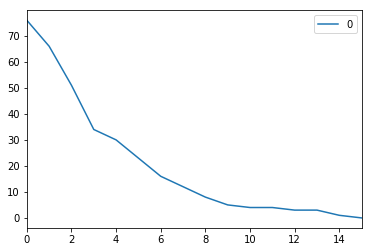

In [103]:
loses.plot()

In [104]:
#That was with Team One, since this is binary, team 2 should probably mirror this. This looks pretty normal.

In [105]:
test2 = d2017[d2017['elo_prob2'] > .5].copy()

In [108]:
test2['Spread_T2'].min()
#-29 was the max loss for a team supposed to win
lst2 = []

In [109]:
for x in range(0, 50, 2):
   lst2.append(test2[test2['Spread_T2'] < -x].count().date)

In [110]:
loses2 = pd.DataFrame(lst2)

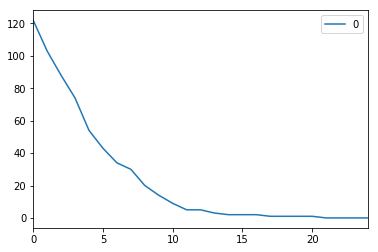

In [111]:
loses2.plot()

In [112]:
loses['loses2'] = loses2

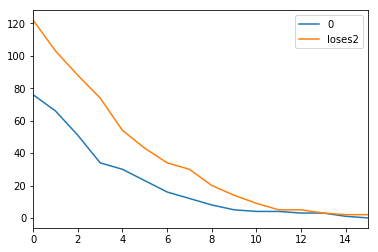

In [114]:
loses.plot()
#What a nice graph

In [115]:
d2017.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carmelo1_pre,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2,Spread_T1,Spread_T2
64473,2016-10-25,2017,0,0,CLE,NYK,1695.521828,1414.545850,0.899626,0.100374,...,1657.0,1445.0,1661.841080,1440.158920,0.848043,0.151957,117,88,29,-29
64474,2016-10-25,2017,0,0,POR,UTA,1584.628972,1530.321395,0.708532,0.291468,...,1566.0,1598.0,1573.544009,1590.455991,0.589423,0.410577,113,104,9,-9
64475,2016-10-25,2017,0,0,GSW,SAS,1692.979250,1695.289874,0.636995,0.363005,...,1829.0,1617.0,1780.087219,1665.912781,0.858340,0.141660,100,129,-29,29
64476,2016-10-26,2017,0,0,IND,DAL,1533.109375,1503.293315,0.678586,0.321414,...,1448.0,1472.0,1455.101604,1464.898396,0.607771,0.392229,130,121,9,-9
64477,2016-10-26,2017,0,0,ORL,MIA,1454.079100,1574.216287,0.471053,0.528947,...,1465.0,1416.0,1446.716903,1434.283097,0.698298,0.301702,96,108,-12,12


In [116]:
#Another way to test for the score would be to see the change in ELO to determine how large the loss would have been.
#Bigger losses = Bigger ELO/Carmelo changes
#Features - Home Team gets a bonus
#ELO Changes will be the biggest one.
#Average Score for Each team up until this point?
#Like a moving average maybe?
#let us create something for just the winners (GSW)

In [121]:
GSW = d2017[(d2017['team1'] == 'GSW') | (d2017['team2'] == 'GSW')].copy()

In [127]:
GSW['GSW_Score'] = GSW[GSW['team1'] == 'GSW']['score1'].fillna(0) + GSW[GSW['team2'] == 'GSW']['score2'].fillna(0)

In [128]:
GSW.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2,Spread_T1,Spread_T2,GSW_Score
64475,2016-10-25,2017,0,0,GSW,SAS,1692.979250,1695.289874,0.636995,0.363005,...,1617.000000,1780.087219,1665.912781,0.858340,0.141660,100,129,-29,29,NaN
64497,2016-10-28,2017,0,0,NOP,GSW,1398.248760,1663.496689,0.278635,0.721365,...,1780.087219,1440.035713,1783.260299,0.207313,0.792687,114,122,-8,8,NaN
64510,2016-10-30,2017,0,0,PHO,GSW,1374.037795,1667.965539,0.246691,0.753309,...,1783.260299,1386.868876,1785.255164,0.158866,0.841134,100,106,-6,6,NaN
64526,2016-11-01,2017,0,0,POR,GSW,1581.274944,1671.268329,0.514397,0.485603,...,1785.255164,1556.651218,1796.032599,0.327975,0.672025,104,127,-23,23,NaN
64541,2016-11-03,2017,0,0,GSW,OKC,1690.006890,1693.819697,0.634993,0.365007,...,1614.309787,1800.345934,1609.996452,0.862687,0.137313,122,96,26,-26,NaN


In [171]:
x = GSW[GSW['team2'] == 'GSW']['score2']
y = GSW[GSW['team1'] == 'GSW']['score1']
GSW['GSW_Score'] = x.append(y)

In [172]:
GSW.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2,Spread_T1,Spread_T2,GSW_Score
64475,2016-10-25,2017,0,0,GSW,SAS,1692.979250,1695.289874,0.636995,0.363005,...,1617.000000,1780.087219,1665.912781,0.858340,0.141660,100,129,-29,29,100
64497,2016-10-28,2017,0,0,NOP,GSW,1398.248760,1663.496689,0.278635,0.721365,...,1780.087219,1440.035713,1783.260299,0.207313,0.792687,114,122,-8,8,122
64510,2016-10-30,2017,0,0,PHO,GSW,1374.037795,1667.965539,0.246691,0.753309,...,1783.260299,1386.868876,1785.255164,0.158866,0.841134,100,106,-6,6,106
64526,2016-11-01,2017,0,0,POR,GSW,1581.274944,1671.268329,0.514397,0.485603,...,1785.255164,1556.651218,1796.032599,0.327975,0.672025,104,127,-23,23,127
64541,2016-11-03,2017,0,0,GSW,OKC,1690.006890,1693.819697,0.634993,0.365007,...,1614.309787,1800.345934,1609.996452,0.862687,0.137313,122,96,26,-26,122


In [175]:
(GSW.GSW_Score.mean())


115.89024390243902

In [176]:
GSW.GSW_Score.max()

149

In [177]:
GSW.GSW_Score.min()

85

In [179]:
GSW.GSW_Score.std()

12.543264482996221

In [180]:
#I will use the first moving average is the one from the previous season, I understand it will be different

In [189]:
GSW['MA'] = GSW.GSW_Score.rolling(10, min_periods = 1).mean()

In [193]:
GSW['Code'] = ''

In [212]:
GSW.drop('code', axis = 1, inplace = True)

In [214]:
GSW.drop('Code', axis = 1, inplace = True)

In [216]:
d2017.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2,Spread_T1,Spread_T2,GSW_Score
64473,2016-10-25,2017,0,0,CLE,NYK,1695.521828,1414.545850,0.899626,0.100374,...,1445.0,1661.841080,1440.158920,0.848043,0.151957,117,88,29,-29,NaN
64474,2016-10-25,2017,0,0,POR,UTA,1584.628972,1530.321395,0.708532,0.291468,...,1598.0,1573.544009,1590.455991,0.589423,0.410577,113,104,9,-9,NaN
64475,2016-10-25,2017,0,0,GSW,SAS,1692.979250,1695.289874,0.636995,0.363005,...,1617.0,1780.087219,1665.912781,0.858340,0.141660,100,129,-29,29,100.0
64476,2016-10-26,2017,0,0,IND,DAL,1533.109375,1503.293315,0.678586,0.321414,...,1472.0,1455.101604,1464.898396,0.607771,0.392229,130,121,9,-9,NaN
64477,2016-10-26,2017,0,0,ORL,MIA,1454.079100,1574.216287,0.471053,0.528947,...,1416.0,1446.716903,1434.283097,0.698298,0.301702,96,108,-12,12,NaN


In [217]:
#Okay, I explored things and thought more about what will work well. I will calculate spreads using elo changes and mean/media/stdev for teams

In [230]:
GSW['Mean'] = GSW['GSW_Score'].mean()

In [232]:
GSW['STD'] = GSW['GSW_Score'].std()

In [234]:
GSW['ELO_Changes'] = ""
GSW['Team_Number'] = ''

In [266]:
GSW.loc[GSW['team2'] == 'GSW',['Team_Number']] = 2
GSW.loc[GSW['team1'] == 'GSW',['Team_Number']] = 1

In [267]:
GSW.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,score2,Spread_T1,Spread_T2,GSW_Score,MA,Mean,STD,ELO_Changes,Team_Number,Team Number
64475,2016-10-25,2017,0,0,GSW,SAS,1692.979250,1695.289874,0.636995,0.363005,...,129,-29,29,100,100.000000,115.890244,12.543264,,1,1
64497,2016-10-28,2017,0,0,NOP,GSW,1398.248760,1663.496689,0.278635,0.721365,...,122,-8,8,122,111.000000,115.890244,12.543264,,2,1
64510,2016-10-30,2017,0,0,PHO,GSW,1374.037795,1667.965539,0.246691,0.753309,...,106,-6,6,106,109.333333,115.890244,12.543264,,2,1
64526,2016-11-01,2017,0,0,POR,GSW,1581.274944,1671.268329,0.514397,0.485603,...,127,-23,23,127,113.750000,115.890244,12.543264,,2,1
64541,2016-11-03,2017,0,0,GSW,OKC,1690.006890,1693.819697,0.634993,0.365007,...,96,26,-26,122,115.400000,115.890244,12.543264,,1,1


In [271]:
GSW.drop('Team Number', axis = 1, inplace = True)

In [273]:
GSW.ELO_Changes = GSW.elo1_pre - GSW.elo1_post

In [279]:
pd.DataFrame([GSW['elo1_pre'], GSW['elo1_post']])

,64475,64497,64510,64526,64541,64550,64571,64587,64591,64615,...,65565,65579,65589,65607,65623,65635,65643,65667,65682,65701
elo1_pre,1692.979250,1398.24876,1374.037795,1581.274944,1690.006890,1357.908479,1670.587184,1672.044882,1470.332197,1688.553197,...,1746.811936,1637.659808,1711.820189,1771.495766,1774.584132,1779.663460,1312.704667,1783.089920,1785.568036,1768.599792
elo1_post,1663.496689,1393.77991,1370.735005,1562.536383,1703.372621,1390.693916,1672.044882,1676.475162,1458.254162,1689.966088,...,1749.388337,1629.606492,1697.766077,1774.584132,1779.663460,1781.483004,1311.097751,1785.568036,1768.599792,1769.617890


In [280]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [323]:
clf = ensemble.GradientBoostingRegressor(**params)
print(clf)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [326]:
clf.fit(x_test, y_test)
clf.predict(x_test)

array([ 16.91320055, -12.87477432,  -5.90460614,  -3.9500708 ,
        22.88657589, -23.80249901,   8.9999835 ,  45.73756718,
        12.95319264,   9.97660331,  -4.92733762,  29.84269491,
         3.02374434, -23.80249901,   9.97660331,   4.01166411,
        13.93995718])

In [285]:
GSW['Spreads'] = GSW['score1'] - GSW['score2']

In [287]:
y = GSW['Spreads']

In [291]:
X_train, X_test, y_train, y_test = train_test_split(GSW, y, test_size = .2)

In [297]:
x = GSW.copy()

In [298]:
x.drop('Spreads', axis = 1, inplace = True)

In [314]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [315]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [312]:
#x.drop('team2',axis = 1, inplace = True)
#x.drop('team1',axis = 1, inplace = True)
#x.drop('date',axis = 1, inplace = True)

In [313]:
x.head()

,season,neutral,playoff,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carmelo1_pre,...,score1,score2,Spread_T1,Spread_T2,GSW_Score,MA,Mean,STD,ELO_Changes,Team_Number
64475,2017,0,0,1692.979250,1695.289874,0.636995,0.363005,1663.496689,1724.772434,1829.000000,...,100,129,-29,29,100,100.000000,115.890244,12.543264,29.482560,1
64497,2017,0,0,1398.248760,1663.496689,0.278635,0.721365,1393.779910,1667.965539,1443.208793,...,114,122,-8,8,122,111.000000,115.890244,12.543264,4.468849,2
64510,2017,0,0,1374.037795,1667.965539,0.246691,0.753309,1370.735005,1671.268329,1388.863741,...,100,106,-6,6,106,109.333333,115.890244,12.543264,3.302790,2
64526,2017,0,0,1581.274944,1671.268329,0.514397,0.485603,1562.536383,1690.006890,1567.428654,...,104,127,-23,23,127,113.750000,115.890244,12.543264,18.738560,2
64541,2017,0,0,1690.006890,1693.819697,0.634993,0.365007,1703.372621,1680.453966,1796.032599,...,122,96,26,-26,122,115.400000,115.890244,12.543264,-13.365731,1


In [319]:
mse = mean_squared_error(y_test, clf.predict(x_test))

In [320]:
print(mse)

1.134473429474939
